Author: Carlos Roberto de Melo
    
Date: 08/12/2020

Obj: Recortar a imagem ao redor de apenas os arcos.

In [1]:
#Pacotes do Autolens
import autofit as af
import autolens as al
import autolens.plot as aplt

Setup the path to our current working directory.

In [2]:
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

Workspace Path:  /home/carlos/autolens_workspace


Loading Data From Individual Fits Files. We're reading both: the arcs and the noise map.

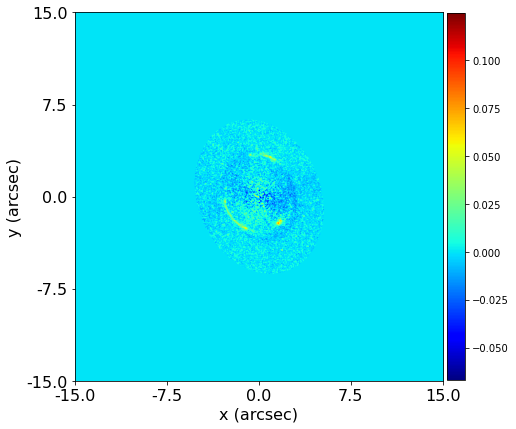

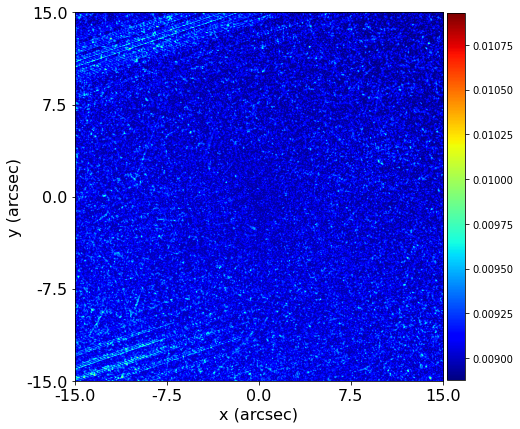

In [20]:
dataset_path = af.util.create_path(
    path=f"{workspace_path}/", folders=["ESO325"]
)

imaging_path = af.util.create_path(path=dataset_path, folders=["Data"])

arcs = al.Array.from_fits(
    file_path=imaging_path + "Gravitational Arcs.fits", pixel_scales=0.04, hdu=1
)

noise = al.Array.from_fits(
    file_path=imaging_path + "noise_map.fits", pixel_scales=0.04
)

aplt.Array(array=arcs)
aplt.Array(array=noise)

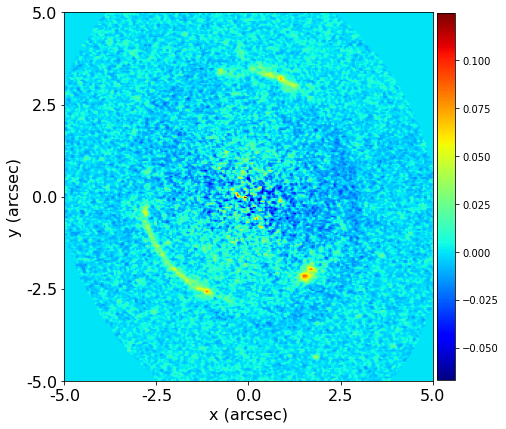

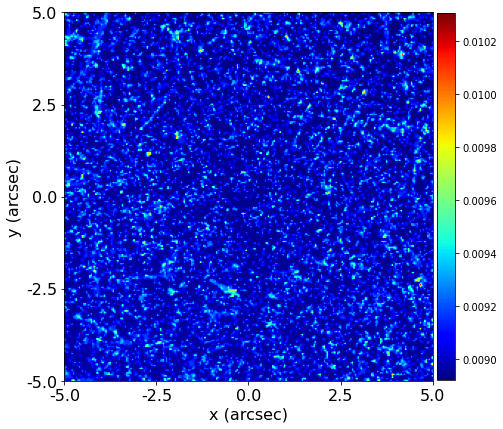

In [23]:
#Resizing image
arcs_resize = al.preprocess.array_with_new_shape(
    array=arcs, new_shape=(250, 250)
)

noise_resize = al.preprocess.array_with_new_shape(
    array=noise, new_shape=(250, 250)
)

aplt.Array(array=arcs_resize)
aplt.Array(array=noise_resize)

In [24]:
#Saving the Noise-Map
noise_resize.output_to_fits(file_path=f"{dataset_path}/Data/noise_map_resized.fits")
arcs_resize.output_to_fits(file_path=f"{dataset_path}/Data/arcs_resized.fits")